# 9장


card.csv의 생김세


In [1]:
import pandas as pd

pd = pd.read_csv("./data/card.csv")

In [2]:
pd.head()

,이용일시,승인번호,본인구분,브랜드,이용카드,가맹점명,이용금액,이용구분,매입상태
0,2019/10/12 09:13,1972753,본,S&,185,네이버파이낸셜(주),546800,일시불(A),부분취소
1,2019/10/12 11:56,3399357,본,S&,185,GS 샵,60440,일시불(A),전표매입
2,2019/10/13 09:16,12621902,본,S&,185,G마켓,91520,P(A),전표매입
3,2019/10/14 01:32,20726947,본,S&,185,11번가,89810,일시불(A),전표매입
4,2019/10/14 07:06,21234320,본,S&,185,네이버파이낸셜(주),33600,일시불(A),전표매입


In [ ]:
import csv

with open('./data/card.csv', 'r') as file:
  data = csv.reader(file)
  next(data)  # <-- 이 함수의 역할이 무엇인지
  data = list(data)

`next(collection)`은 콜랙션 타입의 0번째 인덱스의 값을 날려 버림

즉 card.csv의 0번째 인덱스인 '이용일시	승인번호	본인구분	브랜드	이용카드	가맹점명	이용금액	이용구분	매입상태'을 날림

두번 하면 0과 1을 날려버림



## Dictionary


In [ ]:
import operator

d = {'b': 400, 'f': 300, 'a': 200, 'c': 500}

print('1. original dict')
print(d.items())

print('\n2. sort dictionary')
f = sorted(d.items())
print(f)

print('\n3. sort dictionary itemgetter')
g = sorted(d.items(), key=operator.itemgetter(1))
print(g)

print('\n4. sort dictionary itemgetter, reverse')
r = sorted(d.items(), key=operator.itemgetter(1), reverse=True)
print(r)

1. original dict
dict_items([('b', 400), ('f', 300), ('a', 200), ('c', 500)])

2. sort dictionary
[('a', 200), ('b', 400), ('c', 500), ('f', 300)]

3. sort dictionary itemgetter
[('a', 200), ('f', 300), ('b', 400), ('c', 500)]

4. sort dictionary itemgetter, reverse
[('c', 500), ('b', 400), ('f', 300), ('a', 200)]


{'GS  샵': 60440, 'G마켓': 201630, '11번가': 151010, '네이버파이낸셜(주)': 1395840, '(주)에이랜드 타임스퀘어': 31600, '(주)곱': 96000, '카카오페이(택시)': 78000, '포도당': 75000, '에뛰드': 26410, '미니스톱목동파라곤점': 1300, '(주)우아한형제들': 361430, '스패뉴시청지점': 61800, '티머니 개인택시': 27300, '스타벅스코리아': 100000, '전화결제': 207000, '케이데코(K Deco)': 48000, '씨제이올리브영(주)합정메세나폴': 23200, '타르타르홍대점': 23100, '더본내과의원': 159800, '나폴레옹과자점': 52600, '홈플러스익스프레스신정3점': 3990, '롯데E커머스': 16241, '(주)에스쁘아': 28500, '(주)현대백화점목동점': 415502, 'SSG.COM': 260259, 'GS25 문래미원점': 1500, '(주)라크라센타본점': 18700, '크로키닷컴': 299610, '(주)이랜드월드영등포타임스퀘어': 100, '빠레뜨한남': 56500, '(주)신세계백화점강남점': 333800, '(주)엔터식스패션쇼핑몰 강남점': 26000, '어반플랜트': 57000, '곤트란쉐리에 합정점': 7830, '(주)갈라인터내셔널': 68500, '씨제이올리브영(주)신세계': 42020, '카페마마스타임스퀘어점': 64400, '조아약국': 2300, '씨유목동11단지점': 14200, '(주)이마트  목동점': 305690, '스마일페이 (신라면세점)': 978035, '(주)디지탈명성텍': 4075, 'CU 오목교스퀘어점': 1600, '써브웨이 오목교점': 5900, '갤러리아명품관식품': 18200, '씨제이올리브영(주) 목동역점': 29600, '파리바게뜨 (양천구청점)': 3000, '(주)다른코스메틱스': 29000, '이유': 285000, '씨제이올리브영(주) 목동': 9200, '주식회사

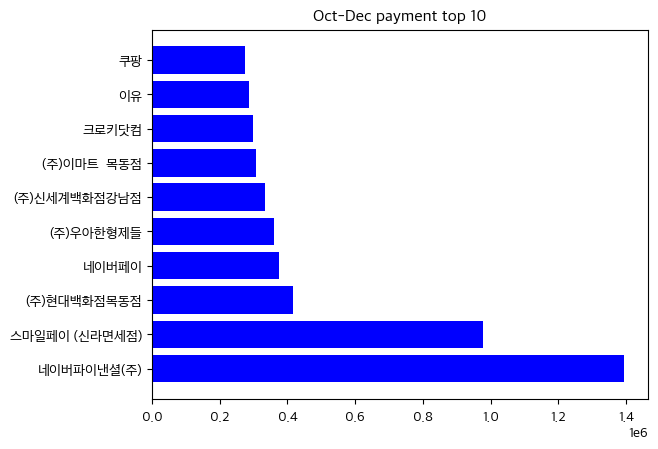

In [6]:
import csv
import matplotlib.pyplot as plt
import operator

with open('./data/card.csv', encoding='utf-8') as f:
  data = csv.reader(f)
  next(data)
  data = list(data)

# 여기를 어떤 데이터 타입으로 해야하는지
spending = {}

for row in data:
  if row[-1] == '전표매입':
    store, payment = row[-4], int(row[-3])
    if store not in spending.keys():
      spending[store] = payment
    else:
      spending[store] += payment

print(spending)

# 여기 로직 이해하기
top10 = sorted(spending.items(), key=operator.itemgetter(1), reverse=True)[:10]

top10_store = []
top10_amount = []

# 이것도 로직 이해
for t in top10:
  top10_store.append(t[0])
  top10_amount.append(t[1])

plt.rc('font', family='Apple SD Gothic Neo')
plt.title('Oct-Dec payment top 10')
plt.barh(top10_store, top10_amount, color='b')
plt.show()